In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("assignment3c.csv")
df['bm'] = (df['bid'] + df['ask'])/2
df_buy = df[df['buysell'] == 'B']
df_sell =  df[df['buysell'] == 'S']

In [18]:
df_buy['cost'] = 10000*(df_buy['price'] - df_buy['bm'])/df_buy['bm']
VWATC_buy = (df_buy['cost'] * df_buy['shares']).sum() /df_buy['shares'].sum() 

df_sell['cost'] = 10000*(df_sell['bm'] - df_sell['price'])/df_sell['bm']
VWATC_sell = (df_sell['cost'] * df_sell['shares']).sum() /df_sell['shares'].sum() 

In [19]:
print(VWATC_buy)
print(VWATC_sell)

0.625084624094974
0.8389693094991193


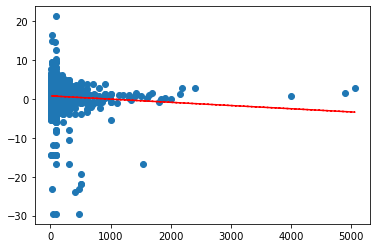

 
-0.0008237 x + 0.7982
                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.750
Date:                Mon, 05 Oct 2020   Prob (F-statistic):             0.0165
Time:                        14:08:25   Log-Likelihood:                -38600.
No. Observations:               21867   AIC:                         7.720e+04
Df Residuals:                   21865   BIC:                         7.722e+04
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P&gt;|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7982    

In [22]:
x = df_buy['shares']
y = df_buy['cost']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,y,'o')
plt.plot(x, p(x), 'r--') 
plt.show()

print(p)
x = sm.add_constant(x)
model = sm.OLS(y,x)
res = model.fit(cov_type = 'HAC', cov_kwds = {'maxlags':6})
print(res.summary())

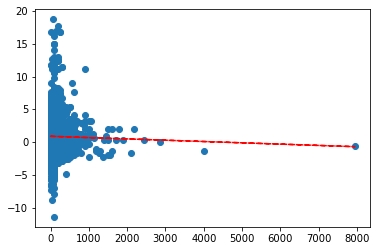

 
-0.0001994 x + 0.8846
                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.052
Date:                Mon, 05 Oct 2020   Prob (F-statistic):             0.0806
Time:                        14:10:36   Log-Likelihood:                -39239.
No. Observations:               21834   AIC:                         7.848e+04
Df Residuals:                   21832   BIC:                         7.850e+04
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P&gt;|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8846    

In [23]:
x = df_sell['shares']
y = df_sell['cost']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,y,'o')
plt.plot(x, p(x), 'r--') 
plt.show()

print(p)
x = sm.add_constant(x)
model = sm.OLS(y,x)
res = model.fit(cov_type = 'HAC', cov_kwds = {'maxlags':6})
print(res.summary())